# **Project Title:-** Red Wine Quality Prediction Using Random Forest: An Ensemble Learning Approach

#  **Introduction to the Dataset**

The Wine Quality Dataset (Red Wine) is a well-known dataset used for machine learning tasks such as regression and classification. It consists of 1,599 observations of red wine samples from the Vinho Verde region of Portugal. Each sample includes 11 physicochemical attributes that describe the wine’s chemical composition, along with one quality score that represents the sensory rating assigned by wine tasters. The goal of analyzing this dataset is typically to predict the quality of wine based on its chemical properties.

The dataset contains the following columns:

* **Fixed acidity** refers to non-volatile acids present in the wine such as tartaric acid, which contribute to the wine's sourness and stability.

* **Volatile acidity** measures the amount of acetic acid, which can give wine an unpleasant vinegar taste when present in high concentrations.

* **Citric acid** is a weak organic acid found in small amounts, adding freshness and enhancing flavor.

* **Residual sugar** is the amount of sugar remaining after fermentation, contributing to the wine's sweetness.

* **Chlorides** indicate the salt content in the wine, which can influence taste and preservation.

* **Free sulfur dioxide** is the portion of sulfur dioxide that actively prevents microbial growth and oxidation in the wine.

* **Total sulfur dioxide** is the combined amount of free and bound SO₂, and excessive amounts can negatively affect wine flavor and cause allergies.

* **Density** relates to the concentration of sugar and alcohol; a higher density typically suggests higher sugar content.

* **pH** measures the acidity or basicity of the wine, with lower values indicating higher acidity.

* **Sulphates** are added to wine for their antimicrobial and antioxidant properties, and they can also affect taste.

* **Alcohol** indicates the percentage of alcohol by volume, which often correlates positively with wine quality.

* **Quality** is the target variable in this dataset, represented as an integer score between 0 and 10, and reflects the sensory rating assigned by wine experts.

# **Importing the libraries**

In [ ]:
import pandas as pd # Data Manipulation and Analysis
import numpy as np # Numerical Operations and Array Handling
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Enhanced Data Visualization

# **Loading the data**

In [ ]:
# Loading the wine quality dataset into a DataFrame
data = pd.read_csv('winequality-red.csv')

In [ ]:
# Displaying the entire dataset
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Tabular Analysis**

In [ ]:
# Displays the first 5 rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Shows info about columns, data types, and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Provides statistical summary of numerical columns
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Checks for missing/null values in each column
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Lists all column names
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# **Data Visualization**

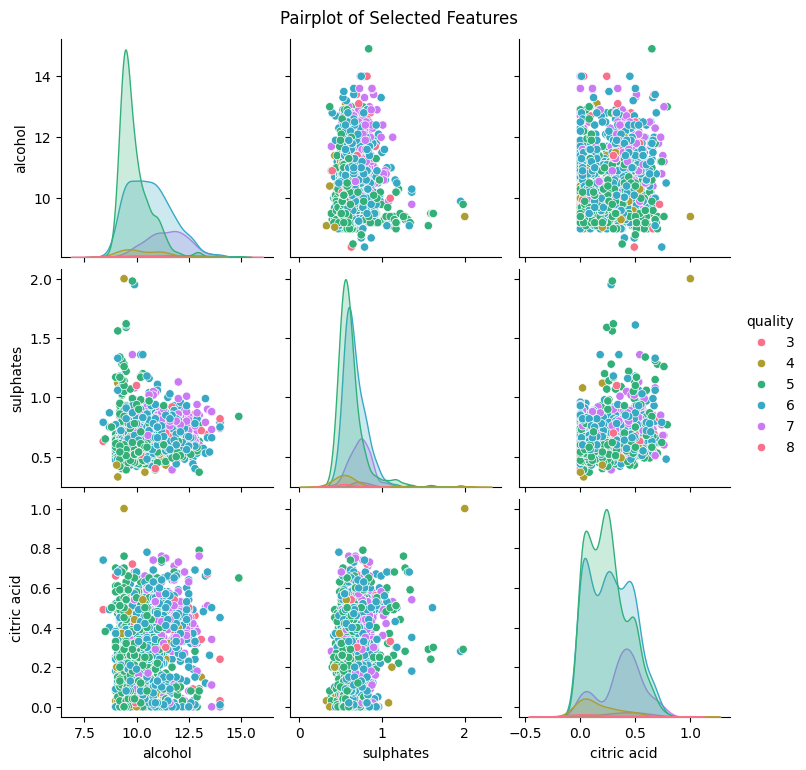

In [ ]:
# Selecting key features for visualization
sampled_data = data[['alcohol', 'sulphates', 'citric acid', 'quality']]

# Creating pairplot to explore relationships between selected features
sns.pairplot(sampled_data, hue="quality", palette="husl")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

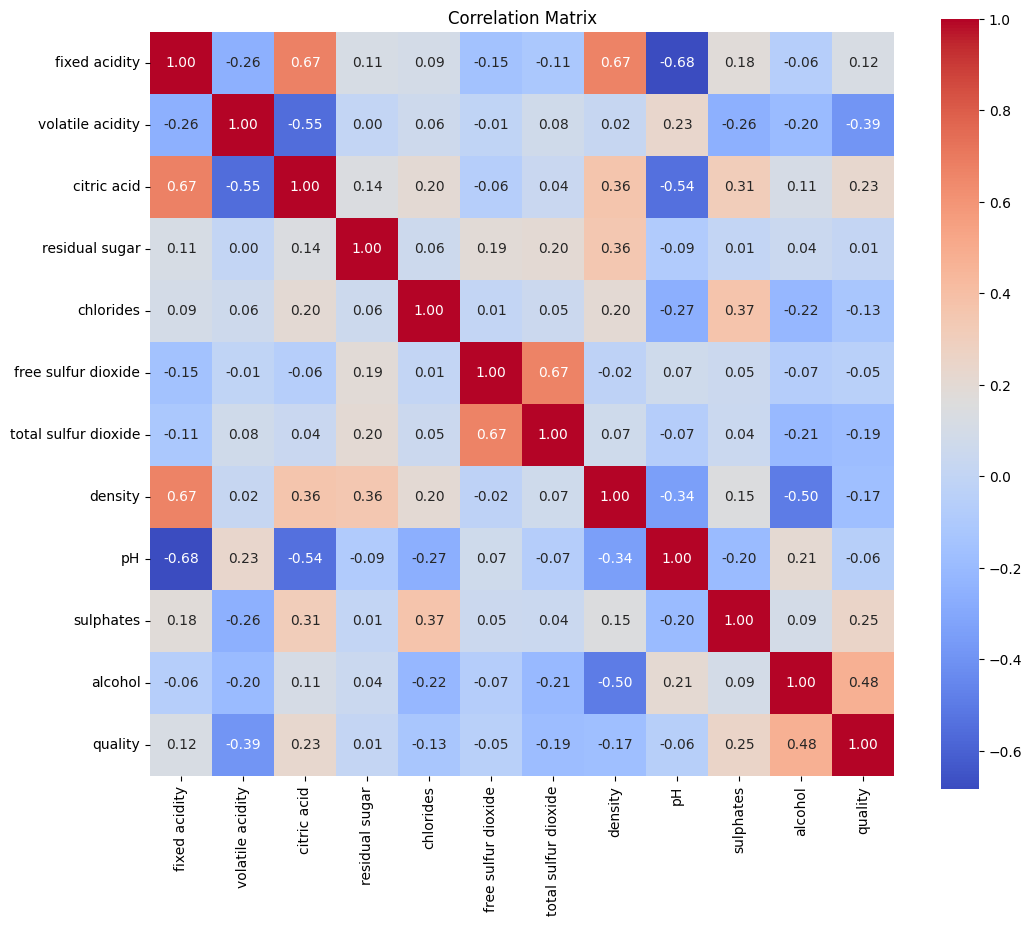

In [ ]:
# Plotting correlation heatmap of all features
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

/tmp/ipython-input-11-2544014701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette="Set2")


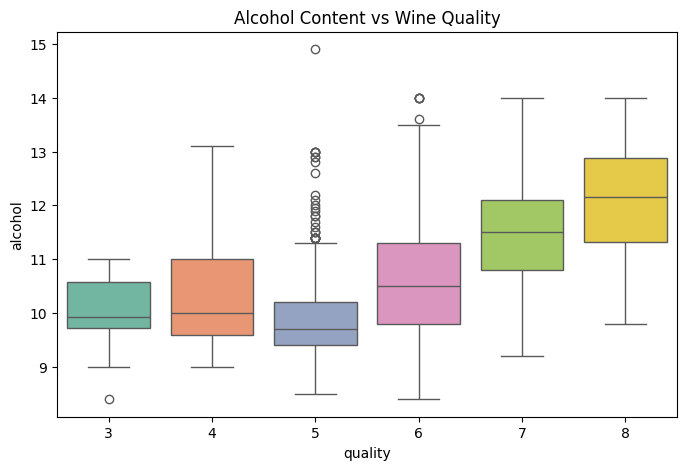

In [ ]:
# Boxplot to show alcohol content variation across wine quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=data, palette="Set2")
plt.title("Alcohol Content vs Wine Quality")
plt.show()

# **Decide Dependent and Independent Elements in Data Set**

In [ ]:
# Separating features (independent variables)
x = data.drop(['quality'], axis = 1)

In [ ]:
# Selecting the target variable
y = data['quality']

In [ ]:
# Displaying features
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
# Displaying target
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


#**Train Test Split**

In [ ]:
# Importing function to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data: 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Displaying structure of training features
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 493 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


In [ ]:
# Displaying structure of testing features
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 803 to 704
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         320 non-null    float64
 1   volatile acidity      320 non-null    float64
 2   citric acid           320 non-null    float64
 3   residual sugar        320 non-null    float64
 4   chlorides             320 non-null    float64
 5   free sulfur dioxide   320 non-null    float64
 6   total sulfur dioxide  320 non-null    float64
 7   density               320 non-null    float64
 8   pH                    320 non-null    float64
 9   sulphates             320 non-null    float64
 10  alcohol               320 non-null    float64
dtypes: float64(11)
memory usage: 30.0 KB


# **Random Forest Model**

## 2. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if `bootstrap=True` (default).

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
***
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function to evaluate model performance on training and test data
def evaluate(model, x_train, x_test, y_train, y_test):
    # Predicting on test and train data
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)

    # Training results
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    # Testing results
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest model with 1000 trees
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

# Training the Random Forest model
rf_clf.fit(x_train, y_train)

# Evaluating the Random Forest model's performance
evaluate(rf_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[  9   0   0   0   0   0]
 [  0  43   0   0   0   0]
 [  0   0 551   0   0   0]
 [  0   0   0 506   0   0]
 [  0   0   0   0 157   0]
 [  0   0   0   0   0  13]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             3     4      5      6      7     8  accuracy  macro avg  \
precision  1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
recall     1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
f1-score   1.0   1.0    1.0    1.0    1.0   1.0       1.0        1.0   
support    9.0  43.0  551.0  506.0  157.0  13.0       1.0     1279.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          1279.0  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 32 93  7  0]
 [ 0  0  0 21 20  1]
 [ 0  0  0  1  4  0]]
ACCURACY SCORE:
0.6594
CLASSIFICATION REPORT:
             3     4           5           6          7

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Initializing the scores dictionary
scores = {}

# Adding training and testing accuracy of Random Forest to the scores dictionary
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(x_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(x_test)),
    }

In [ ]:
# Displaying the updated scores dictionary with Random Forest results
scores

{'Random Forest': {'Train': 1.0, 'Test': 0.659375}}

# **Random Forest - Conclusion**

Random Forest is a popular ensemble learning technique based on the bagging method. It builds multiple decision trees using random subsets of data and features, and averages their results to make a final prediction.

🌲 **Robust & Accurate:** Delivers high accuracy and stability by reducing overfitting through randomness and averaging.

🧠 **Feature Importance:** Offers clear insights into which features are most influential.

🔁 **Low Variance, Medium Bias:** Strikes a good balance, making it suitable for many real-world applications.

**Conclusion:** Random Forest is a highly effective and robust ensemble method. It handles both classification and regression tasks efficiently and provides reliable performance with minimal tuning. Its resistance to overfitting and ability to handle large datasets make it a strong choice in ensemble learning.

